In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
ds = pd.read_csv("ecg_autoencoder_dataset.csv",header=None)
ds.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1


In [4]:
x = ds.drop(140, axis=1)
y = ds[140]

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [7]:
features = x_train.shape[1]

In [8]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential

encoder = Sequential([
    Input(shape=(features,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu')
])

In [9]:
decoder = Sequential([
    Input(shape=(16,)),
    Dense(32, activation='relu'),
    Dense(features, activation='linear')
])

In [10]:
mod = Sequential([
    encoder,
    decoder
])

In [13]:
mod.compile(loss='mean_squared_error',optimizer='adam')
mod.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=512)

Epoch 1/10
8/8 [==============================] - 3s 78ms/step - loss: 0.5962 - val_loss: 0.5321
Epoch 2/10
8/8 [==============================] - 0s 19ms/step - loss: 0.4794 - val_loss: 0.4141
Epoch 3/10
8/8 [==============================] - 0s 18ms/step - loss: 0.3506 - val_loss: 0.2794
Epoch 4/10
8/8 [==============================] - 0s 19ms/step - loss: 0.2304 - val_loss: 0.1711
Epoch 5/10
8/8 [==============================] - 0s 19ms/step - loss: 0.1336 - val_loss: 0.0932
Epoch 6/10
8/8 [==============================] - 0s 18ms/step - loss: 0.0760 - val_loss: 0.0558
Epoch 7/10
8/8 [==============================] - 0s 20ms/step - loss: 0.0490 - val_loss: 0.0377
Epoch 8/10
8/8 [==============================] - 0s 18ms/step - loss: 0.0347 - val_loss: 0.0281
Epoch 9/10
8/8 [==============================] - 0s 19ms/step - loss: 0.0269 - val_loss: 0.0232
Epoch 10/10
8/8 [==============================] - 0s 18ms/step - loss: 0.0228 - val_loss: 0.0205


In [14]:
y_pred = mod.predict(x_test)

32/32 [==============================] - 0s 4ms/step


In [15]:
mse = np.mean(np.power(x_test-y_pred, 2), axis=1)

In [16]:
threshold = np.arange(0.1,1.0,0.1)
for i in threshold:
    anom = mse>i

In [18]:
total_anom = np.sum(anom)
print(i)
print(total_anom)

0.9
753


In [20]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

print(confusion_matrix(y_test, anom))
print("\n",classification_report(y_test,anom))
print("\n", accuracy_score(y_test,anom))

[[240 169]
 [  7 584]]

               precision    recall  f1-score   support

           0       0.97      0.59      0.73       409
           1       0.78      0.99      0.87       591

    accuracy                           0.82      1000
   macro avg       0.87      0.79      0.80      1000
weighted avg       0.86      0.82      0.81      1000


 0.824


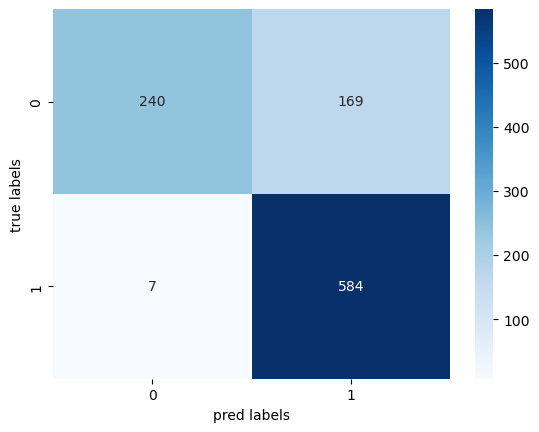

In [24]:
import seaborn as sns
diag = confusion_matrix(y_test, anom)

sns.heatmap(diag, cmap='Blues',annot=True,fmt='d')
plt.xlabel("pred labels")
plt.ylabel("true labels")
plt.show()